In [21]:
import numpy as np
import kaggle
import matplotlib.pyplot as plt

In [22]:
##############################################################################################
# Read in train and test synthetic data
def load_synthetic_data():
        print('Reading synthetic data ...')
        train_x = np.loadtxt('../../Data/Synthetic/data_train.txt', delimiter = ',', dtype=float)
        train_y = np.loadtxt('../../Data/Synthetic/label_train.txt', delimiter = ',', dtype=float)
        test_x = np.loadtxt('../../Data/Synthetic/data_test.txt', delimiter = ',', dtype=float)
        test_y = np.loadtxt('../../Data/Synthetic/label_test.txt', delimiter = ',', dtype=float)

        return (train_x, train_y, test_x, test_y)
###############################################################################################

In [23]:
################################################################
# Compute MSE
def compute_MSE(y, y_hat):
        # mean squared error
        return np.mean(np.power(y - y_hat, 2))
################################################################

In [24]:
train_x, train_y, test_x, test_y = load_synthetic_data()

Reading synthetic data ...


In [25]:
def polynomial_kernel(x, y, p):
    k = np.dot(x,y)
    k += 1
    k = k ** p
    return k

In [26]:
power = 4

In [27]:
kernel = []
for i in range(len(train_x)):
    row = []
    for j in range(len(train_x)):
        row.append(polynomial_kernel(train_x[i],train_x[j],power))
    kernel.append(row)

In [28]:
kernel = np.array(kernel)
kernel.shape

(200, 200)

In [29]:
alpha = np.linalg.inv(kernel + 0.1*np.identity(200))@train_y

In [30]:
#prediction
predictions = []
for x in range(len(test_x)):
    pred = 0
    for i in range(len(kernel)):
        pred += alpha[i]*polynomial_kernel(train_x[i],test_x[x],power)
    predictions.append(pred)

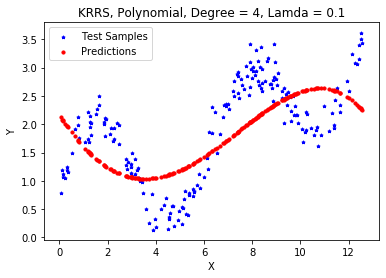

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(test_x,test_y, s=10, c='b', marker="*", label='Test Samples')
ax1.scatter(test_x,predictions, s=10, c='r', marker="o", label='Predictions')
plt.legend(loc='upper left')
plt.title('KRRS, Polynomial, Degree = ' + str(power) + ', Lamda = 0.1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
compute_MSE(test_y,predictions)

0.4326115448483759